[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dhshah1112/CMPE258/blob/main/Assignment5/CMPE258_Assignment5_C.ipynb)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim



In [20]:
# Define the non-linear equation
def nonlinear_equation(x1, x2, x3):
    return x1**2 + x2**3 + torch.sin(x3)

# Generate synthetic data
num_samples = 1000
x1 = torch.randn(num_samples)
x2 = torch.randn(num_samples)
x3 = torch.randn(num_samples)
y = nonlinear_equation(x1, x2, x3)

# Split the data into training and validation sets
train_ratio = 0.8
train_idx = int(num_samples * train_ratio)
X_train = torch.stack([x1[:train_idx], x2[:train_idx], x3[:train_idx]], dim=1)
y_train = y[:train_idx]
X_val = torch.stack([x1[train_idx:], x2[train_idx:], x3[train_idx:]], dim=1)
y_val = y[train_idx:]



In [21]:
# Define the neural network
class NonlinearRegressor(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NonlinearRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(torch.einsum('ik,kj->ij', x, self.fc1.weight.T) + self.fc1.bias)
        x = self.activation(torch.einsum('ik,kj->ij', x, self.fc2.weight.T) + self.fc2.bias)
        x = torch.einsum('ik,kj->ij', x, self.fc3.weight.T) + self.fc3.bias
        return x



In [22]:
# Initialize the model
model = NonlinearRegressor(input_size=3, hidden_size1=64, hidden_size2=32, output_size=1)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train.unsqueeze(1))

    # Backward and optimize
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Validate the model
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val.unsqueeze(1))

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')



Epoch [100/1000], Train Loss: 10.0414, Val Loss: 5.4948
Epoch [200/1000], Train Loss: 5.5578, Val Loss: 2.8254
Epoch [300/1000], Train Loss: 1.7682, Val Loss: 0.9302
Epoch [400/1000], Train Loss: 0.7300, Val Loss: 0.5849
Epoch [500/1000], Train Loss: 0.3390, Val Loss: 0.3615
Epoch [600/1000], Train Loss: 0.1786, Val Loss: 0.2301
Epoch [700/1000], Train Loss: 0.1069, Val Loss: 0.1603
Epoch [800/1000], Train Loss: 0.0709, Val Loss: 0.1267
Epoch [900/1000], Train Loss: 0.0510, Val Loss: 0.1162
Epoch [1000/1000], Train Loss: 0.0384, Val Loss: 0.1161


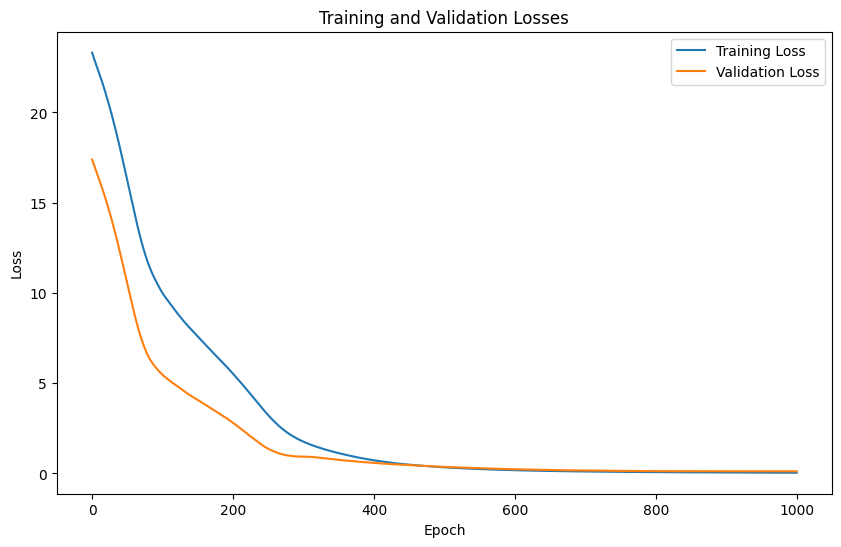

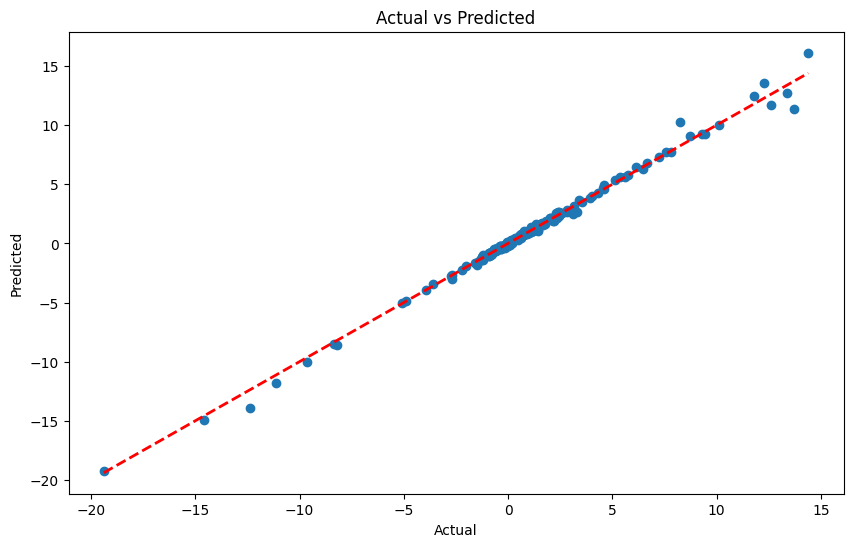

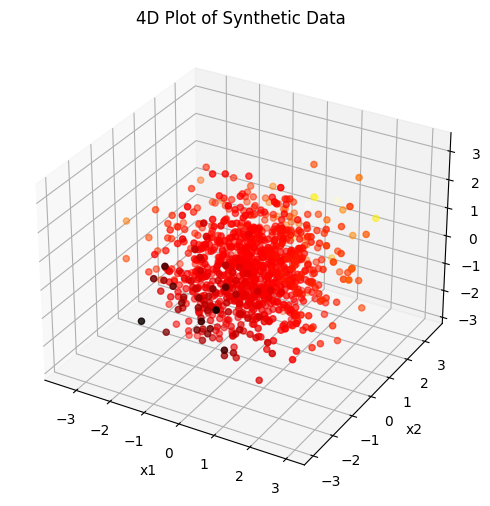

In [23]:
# Plot the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot the actual vs predicted values
with torch.no_grad():
    y_pred = model(X_val).squeeze()

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 4D plot of the synthetic data
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, x3, c=y.detach().numpy())
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of Synthetic Data')
plt.show()